<a href="https://colab.research.google.com/github/rabindramahato3/AppliedAI/blob/main/2_EDA_on_Haberman_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><center><u><b>EXPLORAORY DATA ANALYSIS ON HABERMAN DATASET</b></u></center></H1>

# Introduction

<i><b>Exploratory Data Analysis (EDA)</b> is a process of performing initial investigation on data, so as to discover patterns, to spot anomalies, to test hypothesis, and to check assumptions with the help of summary statistics and graphical representations.

<u>HABERMAN DATASET :</u> <br>
  
  **Dataset Description :** *The Haberman's Survival Dataset contains from a study that was conducted in the period of 1958 - 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.* <br>

Number of Instances: 306 <br>
Number of Attributes: 4 (including the class attribute) <br>

  **Attribute Description :**
- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute) : <br>
 - 1 = the patient survived 5 years or longer
 - 2 = the patient died within 5 year

<i><b>Axillary nodes or Axillary Lymph Nodes</b> are lymph nodes in the human armpit. <b>Between 20 and 49 in number</b>, they drain lymph vessels from the lateral quadrants of the breast, the superficial lymph vessels from thin walls of the chest and the abdomen above the level of the navel, and the vessels from the upper limb. These lymph nodes are clinically significant in breast cancer, and metastases from the breast to the axillary lymph nodes are considered in the staging of the disease.</i>

**Positive Axillary Lymph Node** : A lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.
 - detected 0 : Cancer has not spread to the lymph nodes.
 - detected 1-3 : the nodes inside the breast, show very small amounts of cancerous cells.
 - detected 4-9 :  indicate that the nodes inside the breast have developed cancer.
 - detected more than 10 : Treatment becomes more difficult, and the outlook is less positive or say chances of successful treatment is less.<br>
If cancer is detected in Lymph nodes - Surgery for axillary disection

<u><i><b>More the number of Positive Axillary Lymph Nodes detected, higher the chances of cancer. But cannot tell  anything about survival except presence of cancer.</b></i></u>

# Objective

<i> Our aim is to predict whether the surviavl chances of patients who had undergone breast surgery for a period of 5 years or more based upon patient's age, year of surgery, number of positive axillary lymph nodes.

<u><i><b>Breast Surgery may possibly mean removal of axilllary lymph nodes.</b></i></u>

# Preparing the Data

<i> Before doing anything with our data, we must prepare and check data to enhance performance. Pre-processing of data allows us for the removal of unwanted data with the use of data cleaning, this allows the us to have a dataset to contain more valuable information. 
<p> Data preprocessing has the objective to add missing values, aggregate information, label data with categories and smooth a trajectory.
- Importing the required packages.
- Loading the data.
- Check for duplicates values and apply necessary steps
- Check for missing values and apply necessary steps
- Apply necessary transformation to be more meaningful.

## Importing Packages and Dataset

In [203]:
# check for the input dataset
import os
print(os.listdir())

['.config', 'drive', 'haberman.csv', 'sample_data']


In [204]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [205]:
# load the data
data = pd.read_csv('haberman.csv') 
print(data)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


## Checking for duplicates

In [206]:
# check for duplicates values in the dataset
duplicate = data[data.duplicated()]
print(duplicate)
print(f'\n {len(duplicate)} duplicates found.')


     age  year  nodes  status
23    37    63      0       1
27    38    60      0       1
52    41    65      0       1
65    43    64      0       2
78    44    61      0       1
108   48    58     11       2
132   50    61      0       1
179   54    62      0       1
184   55    58      1       1
196   56    60      0       1
206   57    64      0       1
233   61    59      0       1
237   61    59      0       1
243   62    66      0       1
249   63    63      0       1
266   65    64      0       1
276   67    66      0       1

 17 duplicates found.


<b><u>Observation :</u></b>

- 17 duplicates found. Required to be removed.

In [207]:

# dropping the duplicate rows and reseting the index count
data = data.drop_duplicates()
data.reset_index(inplace = True, drop = True)
print(data)
print(f'\n duplicates removed.')

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
284   75    62      1       1
285   76    67      0       1
286   77    65      3       1
287   78    65      1       2
288   83    58      2       2

[289 rows x 4 columns]

 duplicates removed.


## Checking for NaN or missing value.

In [208]:
# check for missing values
data.isna().any()

age       False
year      False
nodes     False
status    False
dtype: bool

<b><u>Observation :</u></b>

- No missing values in the dataset.

## Dataset Overview

In [209]:
# overview of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     289 non-null    int64
 1   year    289 non-null    int64
 2   nodes   289 non-null    int64
 3   status  289 non-null    int64
dtypes: int64(4)
memory usage: 9.2 KB
None


## Renaming Columns and Replacing values

In [210]:
# updating columns names
data.columns = ['age', 'op_year', 'axil_nodes', 'survived']

In [211]:
# unique values in class atribute
print(data['survived'].unique())

[1 2]


In [212]:
# Replacing '2' for '0'
data.survived[data['survived'] == 2] = 0

In [213]:
# cleaned data for analysis.
haberman = data
print(haberman.head(10))

   age  op_year  axil_nodes  survived
0   30       64           1         1
1   30       62           3         1
2   30       65           0         1
3   31       59           2         1
4   31       65           4         1
5   33       58          10         1
6   33       60           0         1
7   34       59           0         0
8   34       66           9         0
9   34       58          30         1


# Statistical Analysis

## Shape of Dataset, columns names

In [214]:
# number of rows in data
entr_count = haberman.shape[0]
print(f'1. Number of rows/entries : {entr_count}')

# number of columns in data
attr_count = haberman.shape[1]
print(f'2. Number of columns/attributes : {attr_count}')

# columns in data
attr = haberman.columns
print(f'3. Columns/Attributes : {" , ".join(attr)}')

# class attribute and value counts
class_attr = haberman.columns[-1]
print(f'4. Value Counts of {class_attr} in percentage :-')
print(haberman['survived'].value_counts(normalize=True)*100)

1. Number of rows/entries : 289
2. Number of columns/attributes : 4
3. Columns/Attributes : age , op_year , axil_nodes , survived
4. Value Counts of survived in percentage :-
1    72.66436
0    27.33564
Name: survived, dtype: float64


## Dataset Description

In [215]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         289 non-null    int64
 1   op_year     289 non-null    int64
 2   axil_nodes  289 non-null    int64
 3   survived    289 non-null    int64
dtypes: int64(4)
memory usage: 9.2 KB
None


In [216]:
# dataset various statistics
print(haberman.describe())


              age     op_year  axil_nodes    survived
count  289.000000  289.000000  289.000000  289.000000
mean    52.422145   62.906574    4.221453    0.726644
std     10.876915    3.275794    7.325239    0.446455
min     30.000000   58.000000    0.000000    0.000000
25%     44.000000   60.000000    0.000000    0.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.000000   66.000000    5.000000    1.000000
max     83.000000   69.000000   52.000000    1.000000


## Statistical Observations

<b><u>Observation : </u></b>
<br>
1. There are 289 rows and 4 columns namely 'age', 'op_year', 'axil_nodes', 'survived'.
2. 'survived' is taken as class attribute. 'age','op_year','axil_nodes' as features.
3. 72.66% of patients have survived in the dataset compared to 27.34% of dying after 5 years of surgery. This can be IMBALANCED DATASET as there are more surviving cases compared to dying.
- There are no null values.
- Operation has been performed on age ranges from 30(min) years to 83(max) years creating a diverse age groups.
- Most of the operations are performed in the year 1962 with std-dev of 3 years.
 - Medical situation in country at that year can help us.
- 75% of the patients have atmost 5 axillary nodes.
 - This can be reason for high survival rate 0.73.
- Axillary nodes are irregularly distributed. There are hugh difference in 75th percentile and max-values of patients.
  - outliers may be present.
- Axillary nodes mean-value is nearer to min-value so most of the data is nearer to min-value.

# Graphical Analysis

<i>There are several methods used for understanding and exploring the data. One of them is creating data visualizations. They help us both explore and explain the data.

In [217]:
print('OVERALL PATIENTS')
print(haberman.describe())
print('-'*50)
print('SURVIVED PATIENTS')
print(survHaberman.describe())
print('-'*50)
print('DEAD PATIENTS')
print(deadHaberman.describe())

OVERALL PATIENTS
              age     op_year  axil_nodes    survived
count  289.000000  289.000000  289.000000  289.000000
mean    52.422145   62.906574    4.221453    0.726644
std     10.876915    3.275794    7.325239    0.446455
min     30.000000   58.000000    0.000000    0.000000
25%     44.000000   60.000000    0.000000    0.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.000000   66.000000    5.000000    1.000000
max     83.000000   69.000000   52.000000    1.000000
--------------------------------------------------
SURVIVED PATIENTS
              age     op_year  axil_nodes  survived
count  210.000000  210.000000  210.000000     210.0
mean    51.871429   62.919048    2.985714       1.0
std     11.093239    3.260334    6.029813       0.0
min     30.000000   58.000000    0.000000       1.0
25%     43.000000   60.000000    0.000000       1.0
50%     52.000000   63.000000    1.000000       1.0
75%     59.750000   66.000000    3.000000       1.0
max     77.0

## Multivariate Analysis 

<p><i>Multivariate analysis is a Statistical procedure for analysis of data involving more than one type of measurement or observation. It may also mean solving problems where more than one feature variable is analyzed simultaneously with other variables.</i>

### <b><u>PAIR PLOTS:</u></b>

Pair-Plots to see a rough relations between the features in dataset.

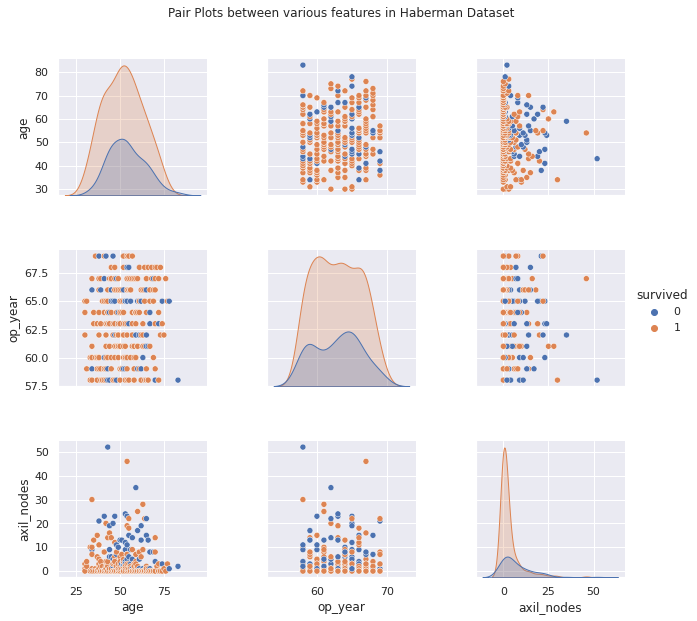

In [218]:
# PAIR PLOT

sns.pairplot(
    data = haberman,
    hue = 'survived',
    size = 3,

)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle('Pair Plots between various features in Haberman Dataset')
plt.show()

<b><u>Observation:</u></b>
<p> Its difficult to predict anything from these.

## Univariate Analysis

<i>Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. 

<b><u>Distribution Plots</u></b>
<p><i>Distribution plots are of crucial importance for exploratory data analysis. They help us detect outliers and skewness, or get an overview of the measures of central tendency (mean, median, and mode).

In [219]:
# set seaborn style
import scipy.stats as stat
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

### <b><u>HISTOGRAM</u></b>

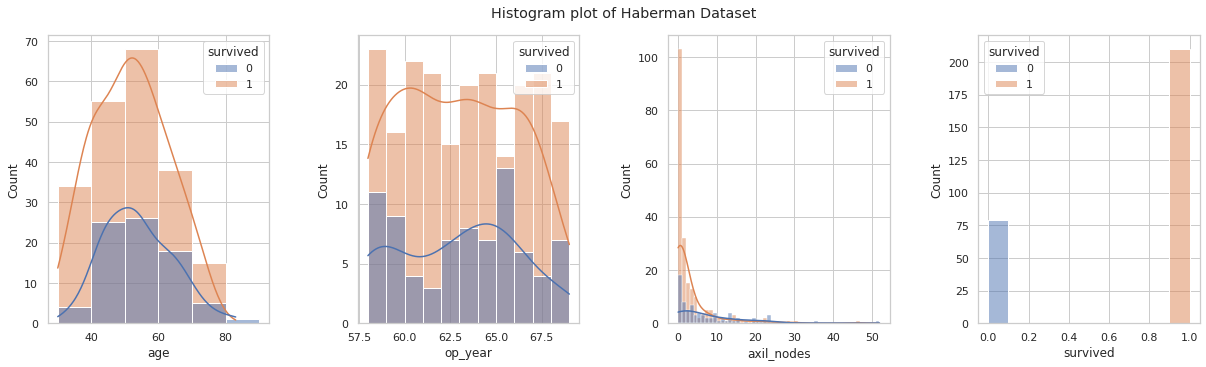

In [220]:

# Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
# -> Most simple distribution plot is histogram. 
#   The data points are grouped into bins and 
#   the height of the bars representing each group increases with increase in the number of data points lie within that group.

# 1. Histogram
fig, axes = plt.subplots(1, 4, figsize=[20,5])
sns.histplot(
    ax = axes[0],
    data = haberman,
    x = 'age',
    hue = 'survived',
    binwidth = 10,
    kde = True
)
sns.histplot(
    ax = axes[1],
    data = haberman,
    x = 'op_year',
    hue = 'survived',
    binwidth = 1,
    kde = True
)
sns.histplot(
    ax = axes[2],
    data = haberman,
    x = 'axil_nodes',
    hue = 'survived',
    binwidth = 1,
    kde = True
)
sns.histplot(
    ax = axes[3],
    data = haberman,
    x = 'survived',
    hue = 'survived',
    kde = True
)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle("Histogram plot of Haberman Dataset")
plt.show()

### <b><u>PDF</u></b>

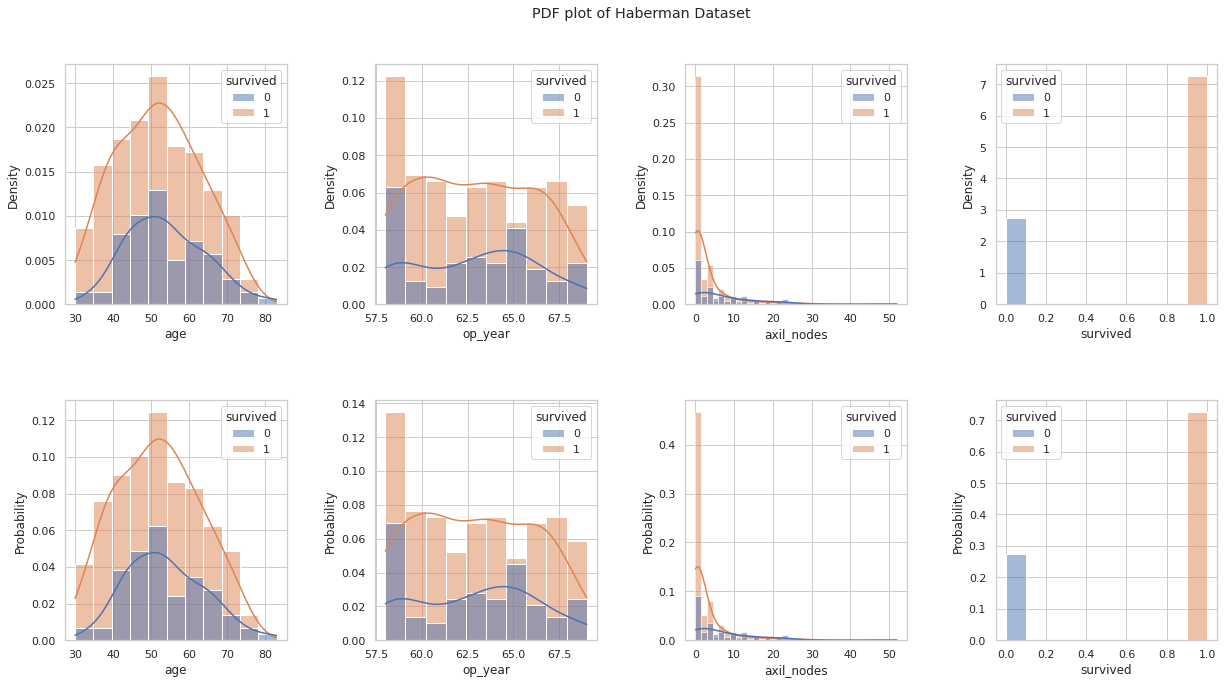

In [221]:
# 2. PDF of the dataset
# -> Probality Density Function (PDF) is the probabilty that the variable takes a value x.
#   This can be said as smoothed version of Histogram.

fig, axes = plt.subplots(2, 4, figsize=[20,10])
for idx, feature in enumerate(haberman.columns):
  sns.histplot(
      ax = axes[0][idx],
      data = haberman,
      x = feature,
      hue = 'survived',
      kde = True,
      stat = 'density'
  )
  sns.histplot(
      ax = axes[1][idx],
      data = haberman,
      x = feature,
      hue = 'survived',
      kde = True,
      stat = 'probability'
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle("PDF plot of Haberman Dataset")
plt.show()

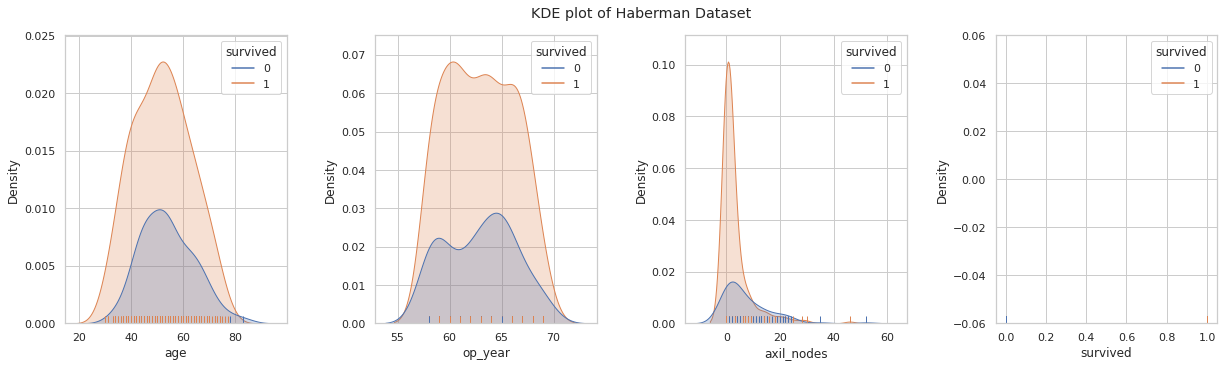

In [222]:
# -> Kernel Density Estimate (KDE) is the way to estimate the PDF. 
fig, axes = plt.subplots(1, 4, figsize=[20,5])
for idx, feature in enumerate(haberman.columns):
  sns.kdeplot(
      ax = axes[idx],
      data = haberman,
      x = feature,
      hue = 'survived',
      shade = True
  )
  sns.rugplot(
      ax = axes[idx],
      data = haberman,
      x = feature,
      hue = 'survived'
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle("KDE plot of Haberman Dataset")
plt.show()

<b><u>Observations :</u></b>
<br>
1. PDF of age shows similarity to normal distribution. PDF of both survived and died patients are overlapping.
2. PDF of operation year also overlapping.
3. PDF of axillary nodes shows similarity of skew distribution.

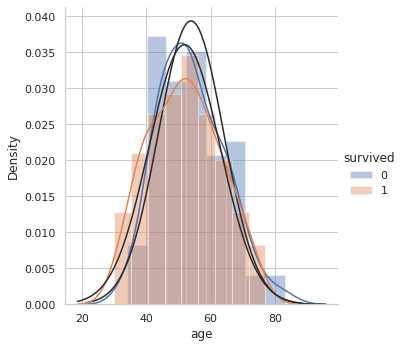

In [223]:
# AGE Analysis
plot = sns.FacetGrid(haberman, hue='survived', size=5)
plot.map(sns.distplot, 'age', fit=stat.norm).add_legend()
plt.show()

<b><u>Observations :</u></b>
<br>
1. PDF shows normal distribution.
2. Cannot used effectively for our objective as more or less patients from same age-group survived or died after the breast surgery

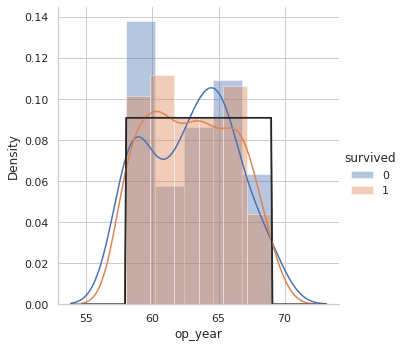

In [224]:
# OPERATION YEAR Analysis
plot = sns.FacetGrid(haberman, hue='survived', size=5)
plot.map(sns.distplot, 'op_year', fit=stat.uniform).add_legend()
plt.show()

<b><u>Observations :</u></b>
<br>
1. PDF shows similarity uniform distribution for survived patients.
2. Cannot used effectively for our objective as more or less patients from same year-group survived or died after the breast surgery
 - Peak deaths can be seen in 1965
 - survivors are decreasing with time.

##### Compaing Survival rate and death rate

In [225]:
# Counting number of dead and survived patients each year.
print(haberman.op_year.value_counts())

58    34
64    28
63    28
65    27
66    26
60    26
67    25
59    25
61    24
62    22
68    13
69    11
Name: op_year, dtype: int64


In [226]:
#  Creating separate dataframes for survived and dead patients
surv , dead = haberman[haberman.survived == 1], haberman[haberman.survived == 0]
print(surv.head())
print(surv.shape)
print(dead.head())
print(dead.shape)

   age  op_year  axil_nodes  survived
0   30       64           1         1
1   30       62           3         1
2   30       65           0         1
3   31       59           2         1
4   31       65           4         1
(210, 4)
    age  op_year  axil_nodes  survived
7    34       59           0         0
8    34       66           9         0
23   38       69          21         0
32   39       66           0         0
41   41       60          23         0
(79, 4)


In [227]:
# create empty df to store survival rate
survRate = pd.DataFrame()

# storing death counts ONLY
survRate = survRate.append(dead.op_year.value_counts())
# storing survived counts ONLY
survRate = survRate.append(surv.op_year.value_counts())
survRate = survRate.transpose()
# Renaming columns
survRate.columns = ['no_of_dead', 'no_of_surv']
print(survRate)

    no_of_dead  no_of_surv
58        11.0        23.0
59         9.0        16.0
60         4.0        22.0
61         3.0        21.0
62         7.0        15.0
63         8.0        20.0
64         7.0        21.0
65        13.0        14.0
66         6.0        20.0
67         4.0        21.0
68         3.0        10.0
69         4.0         7.0


In [228]:
print(survRate.describe())
print(f'total deaths : {survRate.no_of_dead.sum()}, total survivors : {survRate.no_of_surv.sum()}')

       no_of_dead  no_of_surv
count   12.000000   12.000000
mean     6.583333   17.500000
std      3.232177    5.107926
min      3.000000    7.000000
25%      4.000000   14.750000
50%      6.500000   20.000000
75%      8.250000   21.000000
max     13.000000   23.000000
total deaths : 79.0, total survivors : 210.0


In [229]:
survRate['surv_ratio'] = survRate.no_of_surv / survRate.no_of_dead
survRate['death_ratio'] = survRate.no_of_dead / survRate.no_of_surv
# Normalizing to reduce effect of Imbalanced dataset
survRate['surv_ratioNorm'] = survRate.surv_ratio / survRate.surv_ratio.max()
survRate['death_ratioNorm'] = survRate.death_ratio / survRate.death_ratio.max()
print(survRate)

    no_of_dead  no_of_surv  ...  surv_ratioNorm  death_ratioNorm
58        11.0        23.0  ...        0.298701         0.515050
59         9.0        16.0  ...        0.253968         0.605769
60         4.0        22.0  ...        0.785714         0.195804
61         3.0        21.0  ...        1.000000         0.153846
62         7.0        15.0  ...        0.306122         0.502564
63         8.0        20.0  ...        0.357143         0.430769
64         7.0        21.0  ...        0.428571         0.358974
65        13.0        14.0  ...        0.153846         1.000000
66         6.0        20.0  ...        0.476190         0.323077
67         4.0        21.0  ...        0.750000         0.205128
68         3.0        10.0  ...        0.476190         0.323077
69         4.0         7.0  ...        0.250000         0.615385

[12 rows x 6 columns]


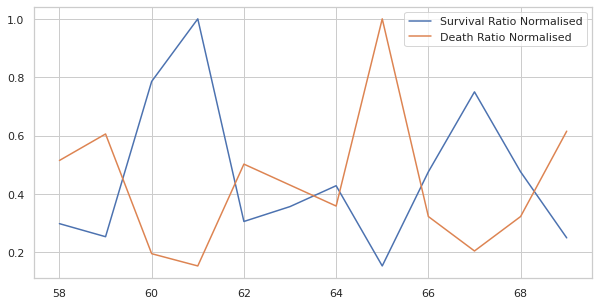

In [230]:
# Plotting the graph
plt.figure(figsize=(10, 5))
survNorm, = plt.plot(survRate["surv_ratioNorm"])
deadNorm, = plt.plot(survRate["death_ratioNorm"])
plt.legend([survNorm, deadNorm], ['Survival Ratio Normalised','Death Ratio Normalised'])
plt.show()

<b><u>Observations :</u></b>
<br>
1. Survival is least in 1965. Patients operated in 1965 have less chances of survival compared to 1961 and 1967.
2. This feature can be used for classification

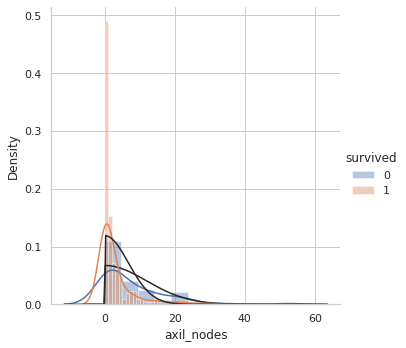

In [231]:
# POSITIVE AXILLARY NODES Analysis
plot = sns.FacetGrid(haberman, hue='survived', size=5)
plot.map(sns.distplot, 'axil_nodes', fit=stat.skewnorm).add_legend()
plt.show()

<b><u>Observations :</u></b>
<br>
1. People with very low positive axillary nodes when operated upon, tend to survive more.
2. People with more positive axillary nodes when operated upon, tend to die relatively more and survive less.
3. For any given number of positive axillary nodes,Survival is always less compared to non-survival except near to zero(atmost 5).

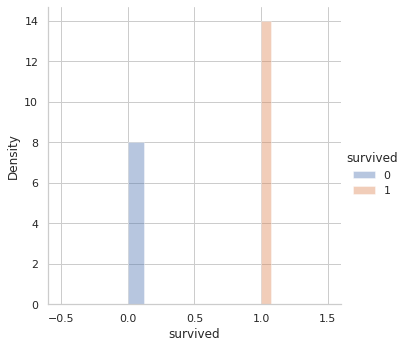

In [232]:
# SURVIVED Analysis
plot = sns.FacetGrid(haberman, hue='survived', size=5)
plot.map(sns.distplot, 'survived').add_legend()
plt.show()


<b><u>Observations :</u></b>
<br>
1. This cannot be much of IMBALANCED DATASET as suvival is more than non-survival(around 75% )

### <b><u> CDF</u></b>

In [233]:
survHaberman = haberman[haberman.survived == 1]
survHaberman.reset_index(inplace=True, drop=True)
deadHaberman = haberman[haberman.survived == 0]
deadHaberman.reset_index(inplace=True, drop=True)

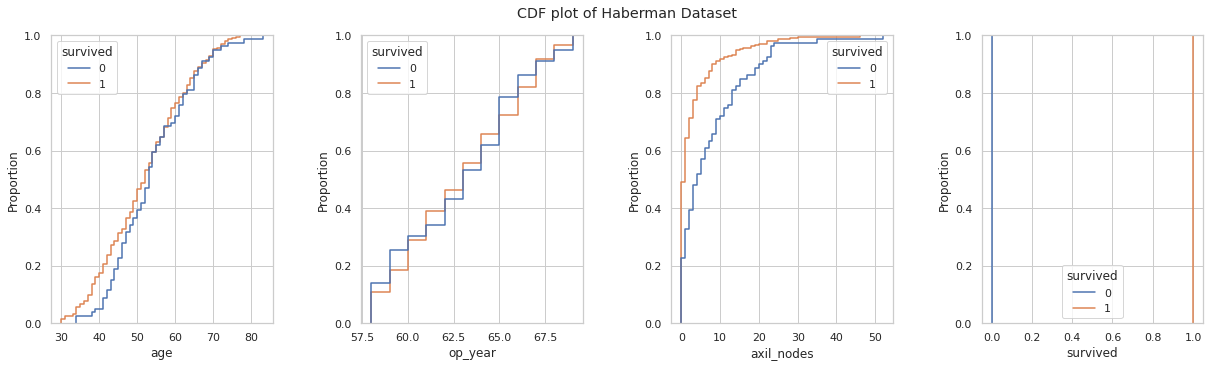

In [234]:
# CDF
# - The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

fig, axes = plt.subplots(1, 4, figsize=[20,5])
for idx, feature in enumerate(haberman.columns):
  sns.ecdfplot(
      ax = axes[idx],
      data = haberman,
      x = feature,
      hue = 'survived',
      stat = 'proportion'
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.suptitle("CDF plot of Haberman Dataset")
plt.show()

CDF of feature - age 

SURVIVED
Bin-Edge : 30.0, PDF : 0.09999999999999995
Bin-Edge : 37.833333333333336, PDF : 0.21428571428571438
Bin-Edge : 45.666666666666664, PDF : 0.24285714285714274
Bin-Edge : 53.5, PDF : 0.22857142857142868
Bin-Edge : 61.33333333333333, PDF : 0.14285714285714293
Bin-Edge : 69.16666666666666, PDF : 0.07142857142857133
----------------------------------------------------------------------------------------------------
DEATH
Bin-Edge : 34.0, PDF : 0.11392405063291142
Bin-Edge : 42.166666666666664, PDF : 0.2784810126582279
Bin-Edge : 50.33333333333333, PDF : 0.29113924050632883
Bin-Edge : 58.5, PDF : 0.20253164556962042
Bin-Edge : 66.66666666666666, PDF : 0.08860759493670879
Bin-Edge : 74.83333333333333, PDF : 0.02531645569620251


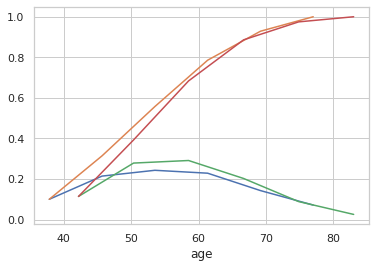

In [235]:
# plt.figure(figsize=(10,5))
print(f'CDF of feature - age \n')
counts, bin_edges = np.histogram(survHaberman.age, bins=6, density = True)
counts2, bin_edges2 = np.histogram(deadHaberman.age, bins=6, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
pdf2 = counts2/(sum(counts2))
cdf2 = np.cumsum(pdf2)
print('SURVIVED')
for i in range(len(bin_edges)-1):
  print(f'Bin-Edge : {bin_edges[i]}, PDF : {pdf[i]}')
print('-'*100)
print('DEATH')
for i in range(len(bin_edges2)-1):
  print(f'Bin-Edge : {bin_edges2[i]}, PDF : {pdf2[i]}')


plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2)
plt.xlabel('age')
plt.show()

<b><u>Observations :</u></b>
<br>

CDF of feature - op_year 

SURVIVED
Bin-Edge : 58.0, PDF : 0.10952380952380952
Bin-Edge : 59.0, PDF : 0.0761904761904762
Bin-Edge : 60.0, PDF : 0.10476190476190476
Bin-Edge : 61.0, PDF : 0.1
Bin-Edge : 62.0, PDF : 0.07142857142857142
Bin-Edge : 63.0, PDF : 0.09523809523809523
Bin-Edge : 64.0, PDF : 0.1
Bin-Edge : 65.0, PDF : 0.06666666666666667
Bin-Edge : 66.0, PDF : 0.09523809523809523
Bin-Edge : 67.0, PDF : 0.1
Bin-Edge : 68.0, PDF : 0.08095238095238096
----------------------------------------------------------------------------------------------------
DEATH
Bin-Edge : 58.0, PDF : 0.13924050632911392
Bin-Edge : 59.0, PDF : 0.11392405063291139
Bin-Edge : 60.0, PDF : 0.05063291139240506
Bin-Edge : 61.0, PDF : 0.0379746835443038
Bin-Edge : 62.0, PDF : 0.08860759493670886
Bin-Edge : 63.0, PDF : 0.10126582278481013
Bin-Edge : 64.0, PDF : 0.08860759493670886
Bin-Edge : 65.0, PDF : 0.16455696202531644
Bin-Edge : 66.0, PDF : 0.0759493670886076
Bin-Edge : 67.0, PDF : 0.05063291139240506
Bin-E

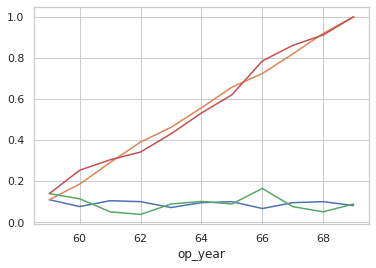

In [236]:
# plt.figure(figsize=(10,5))
print(f'CDF of feature - op_year \n')
counts, bin_edges = np.histogram(survHaberman.op_year, bins=11, density = True)
counts2, bin_edges2 = np.histogram(deadHaberman.op_year, bins=11, density = True)
pdf = counts/(np.sum(counts))
cdf = np.cumsum(pdf)
pdf2 = counts2/(sum(counts2))
cdf2 = np.cumsum(pdf2)
print('SURVIVED')
for i in range(len(bin_edges)-1):
  print(f'Bin-Edge : {bin_edges[i]}, PDF : {pdf[i]}')
print('-'*100)
print('DEATH')
for i in range(len(bin_edges2)-1):
  print(f'Bin-Edge : {bin_edges2[i]}, PDF : {pdf2[i]}')


plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2)
plt.xlabel('op_year')
plt.show()

<b><u>Observations :</u></b>
<br>

CDF of feature - axil_nodes 

SURVIVAL
Bin-Edge : 0.0	 0.8238095238095238
Bin-Edge : 4.6	 0.08571428571428573
Bin-Edge : 9.2	 0.02380952380952381
Bin-Edge : 13.799999999999999	 0.02857142857142857
Bin-Edge : 18.4	 0.01904761904761904
Bin-Edge : 23.0	 0.004761904761904764
Bin-Edge : 27.599999999999998	 0.009523809523809528
Bin-Edge : 32.199999999999996	 0.0
Bin-Edge : 36.8	 0.0
Bin-Edge : 41.4	 0.00476190476190476
----------------------------------------------------------------------------------------------------
DEATH
Bin-Edge : 0.0	 0.569620253164557
Bin-Edge : 5.2	 0.1518987341772152
Bin-Edge : 10.4	 0.12658227848101264
Bin-Edge : 15.600000000000001	 0.05063291139240508
Bin-Edge : 20.8	 0.07594936708860761
Bin-Edge : 26.0	 0.0
Bin-Edge : 31.200000000000003	 0.012658227848101278
Bin-Edge : 36.4	 0.0
Bin-Edge : 41.6	 0.0
Bin-Edge : 46.800000000000004	 0.012658227848101278


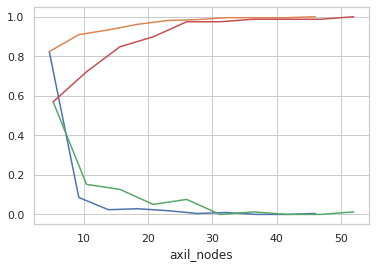

In [237]:
# plt.figure(figsize=(10,5))
print(f'CDF of feature - axil_nodes \n')
counts, bin_edges = np.histogram(survHaberman.axil_nodes, bins=10, density = True)
counts2, bin_edges2 = np.histogram(deadHaberman.axil_nodes, bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
pdf2 = counts2/(sum(counts2))
cdf2 = np.cumsum(pdf2)

print('SURVIVAL')
for i in range(len(bin_edges)-1):
  print(f'Bin-Edge : {bin_edges[i]}\t {pdf[i]}')
print('-'*100)
print('DEATH')
for i in range(len(bin_edges2)-1):
  print(f'Bin-Edge : {bin_edges2[i]}\t {pdf2[i]}')


plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2)
plt.xlabel('axil_nodes')
plt.show()

<b><u>Observations :</u></b>
<br>
1. Most people have maximum 26(approx.) axillary nodes.
2. Except near to zero, Survival is always less compared to non-survival 

### <b><u>MEAN, STD_DEV</u></b>

In [238]:
# AGE Analysis
print('AGE : Mean')
print(f'Overall patients average age : \t\t {np.mean(haberman.age)}')
print(f'Survived patients average age : \t {np.mean(survHaberman.age)}')
print(f'Dead patients average age : \t\t {np.mean(deadHaberman.age)}')
print('-'*50)
print('AGE : Standard-Deviation')
print(f'Overall patients age std-dev : \t\t {np.std(haberman.age)}')
print(f'Survived patients age std-dev : \t {np.std(survHaberman.age)}')
print(f'Dead patients age std-dev : \t\t {np.std(deadHaberman.age)}')

AGE : Mean
Overall patients average age : 		 52.42214532871972
Survived patients average age : 	 51.871428571428574
Dead patients average age : 		 53.88607594936709
--------------------------------------------------
AGE : Standard-Deviation
Overall patients age std-dev : 		 10.858080764523448
Survived patients age std-dev : 	 11.066794729199204
Dead patients age std-dev : 		 10.138268573337252


<b><u>Observations :</u></b>
<br>

In [239]:
# OPERATION YEAR Analysis
print('OPERATION YEAR : Mean')
print(f'Overall patients average operation year : \t {np.mean(haberman.op_year)}')
print(f'Survived patients average operation year : \t {np.mean(survHaberman.op_year)}')
print(f'Dead patients average operation year : \t\t {np.mean(deadHaberman.op_year)}')
print('-'*50)
print('OPERATION YEAR : Standard-Deviation')
print(f'Overall patients operation year std-dev : \t {np.std(haberman.op_year)}')
print(f'Survived patients operation year std-dev : \t {np.std(survHaberman.op_year)}')
print(f'Dead patients operation year std-dev : \t\t {np.std(deadHaberman.op_year)}')

OPERATION YEAR : Mean
Overall patients average operation year : 	 62.90657439446367
Survived patients average operation year : 	 62.91904761904762
Dead patients average operation year : 		 62.87341772151899
--------------------------------------------------
OPERATION YEAR : Standard-Deviation
Overall patients operation year std-dev : 	 3.2701213741326027
Survived patients operation year std-dev : 	 3.2525622204244495
Dead patients operation year std-dev : 		 3.3161174820296506


<b><u>Observations :</u></b>
<br>

In [240]:
# AXILLARY NODES Analysis
print('AXILLARY NODES : Mean')
print(f'Overall patients average axillary nodes : \t {np.mean(haberman.axil_nodes)}')
print(f'Survived patients average axillary nodes : \t {np.mean(survHaberman.axil_nodes)}')
print(f'Dead patients average axillary nodes : \t\t {np.mean(deadHaberman.axil_nodes)}')
print('-'*50)
print('AXILLARY NODES : Standard-Deviation')
print(f'Overall patients axillary nodes std-dev : \t {np.std(haberman.axil_nodes)}')
print(f'Survived patients axillary nodes std-dev : \t {np.std(survHaberman.axil_nodes)}')
print(f'Dead patients axillary nodes std-dev : \t\t {np.std(deadHaberman.axil_nodes)}')

AXILLARY NODES : Mean
Overall patients average axillary nodes : 	 4.221453287197232
Survived patients average axillary nodes : 	 2.9857142857142858
Dead patients average axillary nodes : 		 7.506329113924051
--------------------------------------------------
AXILLARY NODES : Standard-Deviation
Overall patients axillary nodes std-dev : 	 7.3125542590172055
Survived patients axillary nodes std-dev : 	 6.015439319291787
Dead patients axillary nodes std-dev : 		 9.196688200997547


<b><u>Observations :</u></b>
<br>
1. Patients with more positive axillary nodes(approx 7) died but std-dev is more (around 9)

2. Positive axillary nodes can be a good indicators of cancer. i.e Death in 5 years
There is avg of 4 axillary nodes per person but spread is more (std-dev around 7)

In [241]:
# SURVIVED Analysis
print('SURVIVED : Mean')
print(f'Overall patients survived : \t {np.mean(haberman.survived)}')

SURVIVED : Mean
Overall patients survived : 	 0.726643598615917


<b><u>Observations :</u></b>
<br>

### <b><u>MEDIAN, PERCENTILES, MAD, IQR</u></b>

In [242]:
from statsmodels import robust

In [243]:
# AGE Analysis
print('MEDIAN : Age')
print(f'Median of Overall patients Age : \t {np.median(haberman.age)}')
print(f'Median of Survived patients Age : \t {np.median(survHaberman.age)}')
print(f'Median of Dead patients Age : \t\t {np.median(deadHaberman.age)}')
print('-'*50)
print('PERCENTILES : Age')
print("Coverage: 0th, 25th, 50th, 75th Percentiles")
print('Overall patients Age :\t ',np.percentile(haberman.age,np.arange(0, 100, 25)))
print('Survived patients Age :\t ',np.percentile(survHaberman.age,np.arange(0, 100, 25)))
print('Dead patients Age :\t ',np.percentile(deadHaberman.age, np.arange(0, 100, 25)))
print('-'*50)
print('90th PERCENTILE OBSERVATIONS :-')
print(f'90th percentile of Overall patients Age : \t {np.percentile(haberman.age,90)}')
print(f'90th percentile of Survived patients Age : \t {np.percentile(survHaberman.age,90)}')
print(f'90th percentile of Dead patients Age : \t\t {np.percentile(deadHaberman.age,90)}')
print('-'*50)
print('MEDIAN ABSOLUTE DEVIATION :-')
print(f'MAD value of Overall patients Age : \t {robust.mad(haberman.age)}')
print(f'MAD value of Survived patients Age : \t {robust.mad(survHaberman.age)}')
print(f'MAD value of Dead patients Age : \t {robust.mad(deadHaberman.age)}')
print('-'*50)
print('INTER-QUANTILE RANGE(IQR) : ')
print(f'IQR of overall patients age : \t {np.percentile(haberman.age,75) - np.percentile(haberman.age, 25)}')
print(f'IQR of survived patients age : \t {np.percentile(survHaberman.age,75) - np.percentile(survHaberman.age, 25)}')
print(f'IQR of dead patients age : \t {np.percentile(deadHaberman.age,75) - np.percentile(deadHaberman.age, 25)}')

MEDIAN : Age
Median of Overall patients Age : 	 52.0
Median of Survived patients Age : 	 52.0
Median of Dead patients Age : 		 53.0
--------------------------------------------------
PERCENTILES : Age
Coverage: 0th, 25th, 50th, 75th Percentiles
Overall patients Age :	  [30. 44. 52. 60.]
Survived patients Age :	  [30.   43.   52.   59.75]
Dead patients Age :	  [34. 46. 53. 61.]
--------------------------------------------------
90th PERCENTILE OBSERVATIONS :-
90th percentile of Overall patients Age : 	 67.0
90th percentile of Survived patients Age : 	 67.0
90th percentile of Dead patients Age : 		 67.0
--------------------------------------------------
MEDIAN ABSOLUTE DEVIATION :-
MAD value of Overall patients Age : 	 11.860817748044816
MAD value of Survived patients Age : 	 13.343419966550417
MAD value of Dead patients Age : 	 11.860817748044816
--------------------------------------------------
INTER-QUANTILE RANGE(IQR) : 
IQR of overall patients age : 	 16.0
IQR of survived patients 

<b><u>Observations :</u></b>
<br>

In [244]:
# OPERATION YEAR Analysis

print('MEDIAN : Operation Year')
print(f'Median of Overall patients operation year : \t {np.median(haberman.op_year)}')
print(f'Median of Survived patients operation year : \t {np.median(survHaberman.op_year)}')
print(f'Median of Dead patients operation year : \t {np.median(deadHaberman.op_year)}')
print('-'*50)
print('PERCENTILES : Operation Year')
print("Coverage: 0th, 25th, 50th, 75th Percentiles")
print('Overall patients operation year :\t ',np.percentile(haberman.op_year,np.arange(0, 100, 25)))
print('Survived patients operation year :\t ',np.percentile(survHaberman.op_year,np.arange(0, 100, 25)))
print('Dead patients operation year :\t\t ',np.percentile(deadHaberman.op_year, np.arange(0, 100, 25)))
print('-'*50)
print('90th PERCENTILE OBSERVATIONS :-')
print(f'90th percentile of Overall patients Aoperation yearge : \t {np.percentile(haberman.op_year,90)}')
print(f'90th percentile of Survived patients operation year : \t\t {np.percentile(survHaberman.op_year,90)}')
print(f'90th percentile of Dead patients operation year : \t\t {np.percentile(deadHaberman.op_year,90)}')
print('-'*50)
print('MEDIAN ABSOLUTE DEVIATION :-')
print(f'MAD value of Overall patients operation year : \t\t {robust.mad(haberman.op_year)}')
print(f'MAD value of Survived patients operation year : \t {robust.mad(survHaberman.op_year)}')
print(f'MAD value of Dead patients operation year : \t\t {robust.mad(deadHaberman.op_year)}')
print('-'*50)
print('INTER-QUANTILE RANGE(IQR) : ')
print(f'IQR of overall patients operation year : \t {np.percentile(haberman.op_year,75) - np.percentile(haberman.op_year, 25)}')
print(f'IQR of survived patients operation year : \t {np.percentile(survHaberman.op_year,75) - np.percentile(survHaberman.op_year, 25)}')
print(f'IQR of dead patients operation year : \t\t {np.percentile(deadHaberman.op_year,75) - np.percentile(deadHaberman.op_year, 25)}')

MEDIAN : Operation Year
Median of Overall patients operation year : 	 63.0
Median of Survived patients operation year : 	 63.0
Median of Dead patients operation year : 	 63.0
--------------------------------------------------
PERCENTILES : Operation Year
Coverage: 0th, 25th, 50th, 75th Percentiles
Overall patients operation year :	  [58. 60. 63. 66.]
Survived patients operation year :	  [58. 60. 63. 66.]
Dead patients operation year :		  [58.  59.5 63.  65. ]
--------------------------------------------------
90th PERCENTILE OBSERVATIONS :-
90th percentile of Overall patients Aoperation yearge : 	 67.0
90th percentile of Survived patients operation year : 		 67.0
90th percentile of Dead patients operation year : 		 67.0
--------------------------------------------------
MEDIAN ABSOLUTE DEVIATION :-
MAD value of Overall patients operation year : 		 4.447806655516806
MAD value of Survived patients operation year : 	 4.447806655516806
MAD value of Dead patients operation year : 		 4.44780

<b><u>Observations :</u></b>
<br>

In [245]:
# AXILLARY NODES Analysis

print('MEDIAN : Axillary Nodes')
print(f'Median of Overall patients Axillary Nodes : \t {np.median(haberman.axil_nodes)}')
print(f'Median of Survived patients Axillary Nodes : \t {np.median(survHaberman.axil_nodes)}')
print(f'Median of Dead patients Axillary Nodes : \t {np.median(deadHaberman.axil_nodes)}')
print('-'*50)
print('PERCENTILES : Axillary Nodes')
print("Coverage: 0th, 25th, 50th, 75th Percentiles")
print('Overall patients Axillary Nodes :\t ',np.percentile(haberman.axil_nodes,np.arange(0, 100, 25)))
print('Survived patients Axillary Nodes :\t ',np.percentile(survHaberman.axil_nodes,np.arange(0, 100, 25)))
print('Dead patients Axillary Nodes :\t\t ',np.percentile(deadHaberman.axil_nodes, np.arange(0, 100, 25)))
print('-'*50)
print('90th PERCENTILE OBSERVATIONS :-')
print(f'90th percentile of Overall patients Axillary Nodes : \t {np.percentile(haberman.axil_nodes,90)}')
print(f'90th percentile of Survived patients Axillary Nodes : \t {np.percentile(survHaberman.axil_nodes,90)}')
print(f'90th percentile of Dead patients Axillary Nodes : \t {np.percentile(deadHaberman.axil_nodes,90)}')
print('-'*50)
print('MEDIAN ABSOLUTE DEVIATION :-')
print(f'MAD value of Overall patients Axillary Nodes : \t\t {robust.mad(haberman.axil_nodes)}')
print(f'MAD value of Survived patients Axillary Nodes : \t {robust.mad(survHaberman.axil_nodes)}')
print(f'MAD value of Dead patients Axillary Nodes : \t\t {robust.mad(deadHaberman.axil_nodes)}')
print('-'*50)
print('INTER-QUANTILE RANGE(IQR) : ')
print(f'IQR of overall patients Axillary Nodes : \t {np.percentile(haberman.axil_nodes,75) - np.percentile(haberman.axil_nodes, 25)}')
print(f'IQR of survived patients Axillary Nodes : \t {np.percentile(survHaberman.axil_nodes,75) - np.percentile(survHaberman.axil_nodes, 25)}')
print(f'IQR of dead patients Axillary Nodes : \t\t {np.percentile(deadHaberman.axil_nodes,75) - np.percentile(deadHaberman.axil_nodes, 25)}')

MEDIAN : Axillary Nodes
Median of Overall patients Axillary Nodes : 	 1.0
Median of Survived patients Axillary Nodes : 	 1.0
Median of Dead patients Axillary Nodes : 	 4.0
--------------------------------------------------
PERCENTILES : Axillary Nodes
Coverage: 0th, 25th, 50th, 75th Percentiles
Overall patients Axillary Nodes :	  [0. 0. 1. 5.]
Survived patients Axillary Nodes :	  [0. 0. 1. 3.]
Dead patients Axillary Nodes :		  [ 0.   1.   4.  11.5]
--------------------------------------------------
90th PERCENTILE OBSERVATIONS :-
90th percentile of Overall patients Axillary Nodes : 	 13.199999999999989
90th percentile of Survived patients Axillary Nodes : 	 8.099999999999994
90th percentile of Dead patients Axillary Nodes : 	 20.200000000000003
--------------------------------------------------
MEDIAN ABSOLUTE DEVIATION :-
MAD value of Overall patients Axillary Nodes : 		 1.482602218505602
MAD value of Survived patients Axillary Nodes : 	 1.482602218505602
MAD value of Dead patients Ax

<b><u>Observations :</u></b>
<br>

In [246]:
# SURVIVED Analysis

<b><u>Observations :</u></b>
<br>

### <b><u>BOX PLOTS:</u></b>

A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.


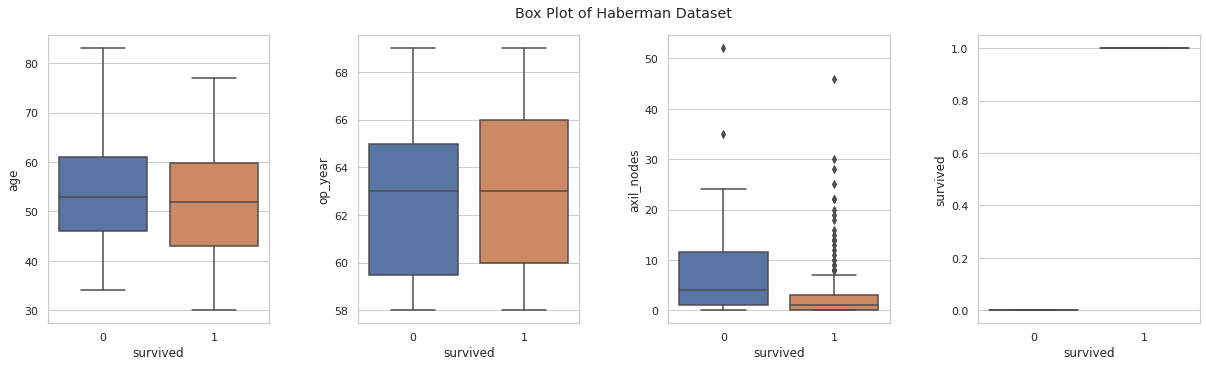

In [247]:
# BOX PLOTS

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for idx, feature in enumerate(list(haberman.columns)):
  sns.boxplot(
      ax = axes[idx],
      x = 'survived',
      y = feature,
      data = haberman
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)  
plt.suptitle('Box Plot of Haberman Dataset')
plt.show()


<b><u>Observations : </u></b>
1. From Box-Plot we can observe presence of outliers in axillary nodes.
2. Most of the patients have very low(less than 5) axillary nodes.
3. Above plot shows points between 8 to 50, these are outliers as there are not included in the box of other observation i.e no where near the quartiles. These outliers need to be corrected.

#### IQR Score for Outliers Correction/Removal

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [267]:
# IQR of survived Haberman patients dataset
print('SURIVED dataset')
Q1 = survHaberman.quantile(0.25)
Q3 = survHaberman.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('DEAD dataset')
Q1d = deadHaberman.quantile(0.25)
Q3d = deadHaberman.quantile(0.75)
IQRd = Q3d - Q1d
print(IQRd)

SURIVED dataset
age           16.75
op_year        6.00
axil_nodes     3.00
survived       0.00
dtype: float64
DEAD dataset
age           15.0
op_year        5.5
axil_nodes    10.5
survived       0.0
dtype: float64


In [268]:
# As we now have the IQR scores, it’s time to get hold on outliers. 
# The below code will give an output with some true and false values. The data point 
# where we have False that means these values are valid whereas True indicates presence of an outlier.

print(survHaberman < (Q1 - 1.5*IQR) | (survHaberman > (Q3 + 1.5*IQR)))
print(deadHaberman < (Q1d - 1.5*IQRd) | (deadHaberman > (Q3d + 1.5*IQRd)))

       age  op_year  axil_nodes  survived
0    False    False       False     False
1    False    False       False     False
2    False    False        True     False
3    False    False       False     False
4    False    False       False     False
..     ...      ...         ...       ...
205  False    False        True     False
206  False    False        True     False
207  False    False       False     False
208  False    False        True     False
209  False    False       False     False

[210 rows x 4 columns]
      age  op_year  axil_nodes  survived
0   False    False        True     False
1   False    False       False     False
2   False    False       False     False
3   False    False        True     False
4   False    False       False     False
..    ...      ...         ...       ...
74  False    False       False     False
75  False    False        True     False
76  False    False       False     False
77  False    False       False     False
78  False    False   

In [269]:
# REMOVING OUTLIERS :
survHabermanNew = survHaberman[~((survHaberman < (Q1 - 1.5*IQR)) | (survHaberman > (Q3 + 1.5*IQR))).any(axis=1)]
survHabermanNew.reset_index(inplace=True, drop=True)
print(survHabermanNew)
deadHabermanNew = deadHaberman[~((deadHaberman < (Q1d - 1.5*IQRd)) | (deadHaberman > (Q3d + 1.5*IQRd))).any(axis=1)]
deadHabermanNew.reset_index(inplace=True, drop=True)
print(deadHabermanNew)

     age  op_year  axil_nodes  survived
0     30       64           1         1
1     30       62           3         1
2     30       65           0         1
3     31       59           2         1
4     31       65           4         1
..   ...      ...         ...       ...
179   73       68           0         1
180   74       63           0         1
181   75       62           1         1
182   76       67           0         1
183   77       65           3         1

[184 rows x 4 columns]
    age  op_year  axil_nodes  survived
0    34       59           0         0
1    34       66           9         0
2    38       69          21         0
3    39       66           0         0
4    41       60          23         0
..  ...      ...         ...       ...
72   70       58           4         0
73   72       63           0         0
74   74       65           3         0
75   78       65           1         0
76   83       58           2         0

[77 rows x 4 columns]


In [270]:
habermanNew = pd.concat([survHabermanNew, deadHabermanNew])
habermanNew.reset_index(inplace=True, drop=True)
print(habermanNew)

     age  op_year  axil_nodes  survived
0     30       64           1         1
1     30       62           3         1
2     30       65           0         1
3     31       59           2         1
4     31       65           4         1
..   ...      ...         ...       ...
256   70       58           4         0
257   72       63           0         0
258   74       65           3         0
259   78       65           1         0
260   83       58           2         0

[261 rows x 4 columns]


<b><u>Observations :</u></b>

#### EDA ON NEW SURVIVAL DATASET

In [292]:

print('-'*20,'Old','-'*20)
print(haberman.info())
print('-'*20,'New','-'*20)
print(habermanNew.info())


-------------------- Old --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         289 non-null    int64
 1   op_year     289 non-null    int64
 2   axil_nodes  289 non-null    int64
 3   survived    289 non-null    int64
dtypes: int64(4)
memory usage: 9.2 KB
None
-------------------- New --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         261 non-null    int64
 1   op_year     261 non-null    int64
 2   axil_nodes  261 non-null    int64
 3   survived    261 non-null    int64
dtypes: int64(4)
memory usage: 8.3 KB
None


<b><u>Observations :</u></b>
<br>
1. entries decreased from 289 to 261 i.e., 28 outliers removed.

In [293]:
print('-'*20,'Old','-'*20)
print(haberman.describe())
print('-'*20,'New','-'*20)
print(habermanNew.describe())


-------------------- Old --------------------
              age     op_year  axil_nodes    survived
count  289.000000  289.000000  289.000000  289.000000
mean    52.422145   62.906574    4.221453    0.726644
std     10.876915    3.275794    7.325239    0.446455
min     30.000000   58.000000    0.000000    0.000000
25%     44.000000   60.000000    0.000000    0.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.000000   66.000000    5.000000    1.000000
max     83.000000   69.000000   52.000000    1.000000
-------------------- New --------------------
              age     op_year  axil_nodes    survived
count  261.000000  261.000000  261.000000  261.000000
mean    52.720307   62.911877    2.743295    0.704981
std     10.801101    3.274008    4.822942    0.456928
min     30.000000   58.000000    0.000000    0.000000
25%     45.000000   60.000000    0.000000    0.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.000000   66.000000    3.000000   

<b><u>Observations :</u></b>
<br>
1. Mean axillary nodes changes from 4 to 2. Also IQR range decreased from 5 to 3, means data is less spread. std-dev changed from 7.33 to 4.82.max-value decreased from 52 to 24.
75% of patients have less than 4 axillary nodes
2. survival rate is down to 0.7

In [294]:
print('-'*20,'Old','-'*20)
print(survHaberman.describe())
print('-'*20,'New','-'*20)
print(survHabermanNew.describe())


-------------------- Old --------------------
              age     op_year  axil_nodes  survived
count  210.000000  210.000000  210.000000     210.0
mean    51.871429   62.919048    2.985714       1.0
std     11.093239    3.260334    6.029813       0.0
min     30.000000   58.000000    0.000000       1.0
25%     43.000000   60.000000    0.000000       1.0
50%     52.000000   63.000000    1.000000       1.0
75%     59.750000   66.000000    3.000000       1.0
max     77.000000   69.000000   46.000000       1.0
-------------------- New --------------------
              age     op_year  axil_nodes  survived
count  184.000000  184.000000  184.000000     184.0
mean    52.201087   62.896739    1.141304       1.0
std     11.011559    3.258480    1.762273       0.0
min     30.000000   58.000000    0.000000       1.0
25%     43.000000   60.000000    0.000000       1.0
50%     52.000000   63.000000    0.000000       1.0
75%     59.250000   66.000000    2.000000       1.0
max     77.000000   69.0

<b><u>Observations :</u></b>
<br>
1. Good improvements in axillary nodes, as IQR range decreased, difference between 75th percentile and max-value also decreased. median is down to 0 from 1. big drop in std-dev from 6.03 to 1.76
2. new average age is equivalent to population average age. 

In [295]:
print('-'*20,'Old','-'*20)
print(deadHaberman.describe())
print('-'*20,'New','-'*20)
print(deadHabermanNew.describe())


-------------------- Old --------------------
             age    op_year  axil_nodes  survived
count  79.000000  79.000000   79.000000      79.0
mean   53.886076  62.873418    7.506329       0.0
std    10.203051   3.337307    9.255454       0.0
min    34.000000  58.000000    0.000000       0.0
25%    46.000000  59.500000    1.000000       0.0
50%    53.000000  63.000000    4.000000       0.0
75%    61.000000  65.000000   11.500000       0.0
max    83.000000  69.000000   52.000000       0.0
-------------------- New --------------------
             age    op_year  axil_nodes  survived
count  77.000000  77.000000   77.000000      77.0
mean   53.961039  62.948052    6.571429       0.0
std    10.243665   3.332046    7.144060       0.0
min    34.000000  58.000000    0.000000       0.0
25%    46.000000  60.000000    1.000000       0.0
50%    53.000000  63.000000    4.000000       0.0
75%    61.000000  65.000000   11.000000       0.0
max    83.000000  69.000000   24.000000       0.0


<b><u>Observations :</u></b>
<br>
1. max value decresed from 52 to 24 but IQR range remained same i.e., data spreading remianed same. std-dev changed from 9.25 to 7.14.

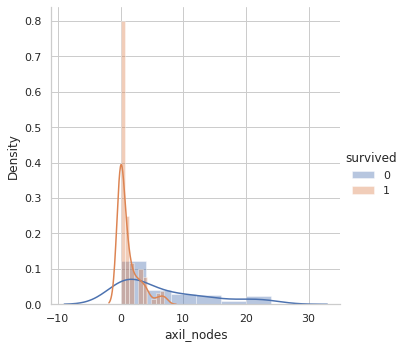

In [301]:
# POSITIVE AXILLARY NODES Analysis
plot = sns.FacetGrid(habermanNew, hue='survived', size=5)
plot.map(sns.distplot, 'axil_nodes').add_legend()
plt.show()

<b><u>Observations :</u></b>
<br>
For any given number of positive axil nodes (except near to zero), Survival is always less compared to non-survival

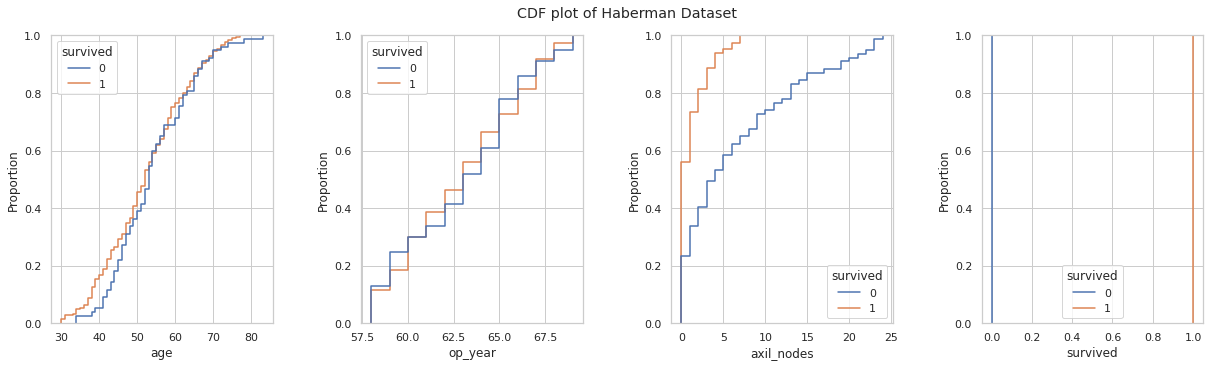

In [284]:
# CDF
# - The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

fig, axes = plt.subplots(1, 4, figsize=[20,5])
for idx, feature in enumerate(habermanNew.columns):
  sns.ecdfplot(
      ax = axes[idx],
      data = habermanNew,
      x = feature,
      hue = 'survived'
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.suptitle("CDF plot of Haberman Dataset")
plt.show()

<b><u>Observations :</u></b>
<br>
1. CDF of axillary nodes can be good choice for classification as after 7 axillary nodes chance of death becomes very high.

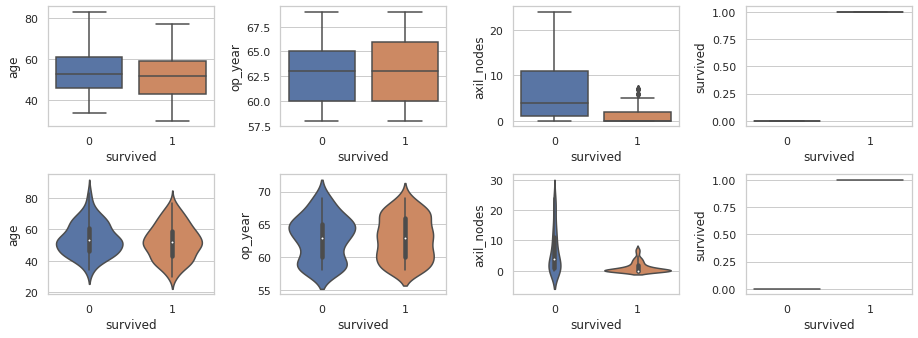

In [288]:
fig, axes = plt.subplots(2, 4, figsize=[15,5])
for idx, feature in enumerate(habermanNew.columns):
  sns.boxplot(
      ax = axes[0][idx],
      x = 'survived',
      y = feature,
      data = habermanNew  )
  sns.violinplot(
      ax = axes[1][idx],
      x = 'survived',
      y = feature,
      data = habermanNew  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [304]:
np.percentile(habermanNew.axil_nodes, 90)

8.0

In [303]:
np.percentile(survHabermanNew.axil_nodes, 90)

4.0

<b><u>Observations :</u></b>
<br>
1. Outliers decreased significantly. 
2. survived patients age shows normal distribution. 
3. axillary nodes of survived patients is concentrated in a range of 0 to 7
4. 90% of overall patients have atmost 8 axillary nodes, 90% survived patients have atmost 4 axillary nodes

### <b><u>SCATTER PLOTS:</u></b>

A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

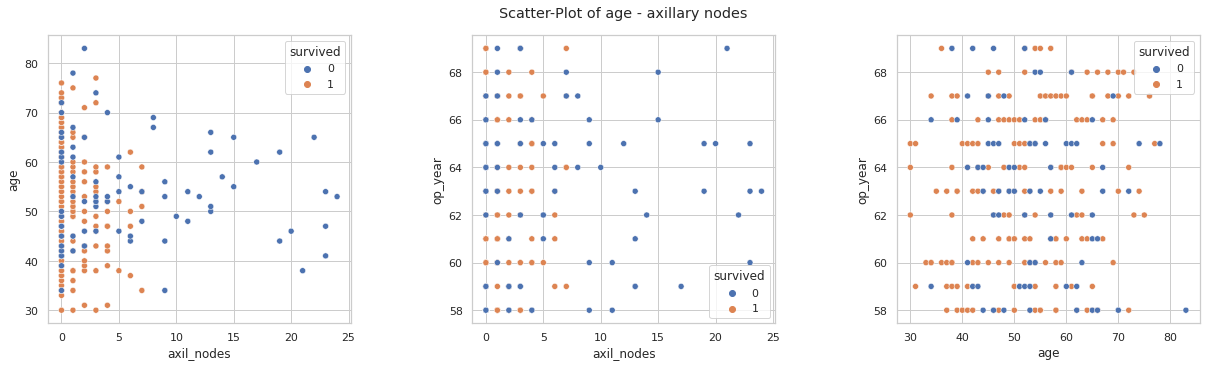

In [296]:
# age vs axillary nodes

fig, axes = plt.subplots(1, 3, figsize=[20,5])
sns.scatterplot(
    data = habermanNew,
    y = 'age',
    x = 'axil_nodes',
    hue = 'survived',
    ax = axes[0]
)
sns.scatterplot(
    data = habermanNew,
    y = 'op_year',
    x = 'axil_nodes',
    hue = 'survived',
    ax = axes[1]
)
sns.scatterplot(
    data = habermanNew,
    y = 'op_year',
    x = 'age',
    hue = 'survived',
    ax = axes[2]
)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle('Scatter-Plots betwwen various combination of features')
plt.show()

<b><u>Observations :</u></b>
<br>
1. High chances of survival for low axillary nodes.

<b><u>3D PLOTS</u></b>

In [297]:
import plotly.express as px

In [299]:
# 3D plots


fig = px.scatter_3d(habermanNew, x='axil_nodes', y='op_year', z='age',
              color='survived', size='op_year', size_max=25,)
fig.show()

# Summary of EDA Performed :

<i> <b>Haberman Dataset</b> contains case study that was conducted in the period of 1958 - 1970 at the University of Chicago's Bilings Hospital on the survival of patients who had undergone surgery for Breast Cancer. Haberman Dataset contains four columns namely - **age, year, nodes, status** with status being class attribute.

<p>
Number of Instances: 306 <br>
Number of Attributes: 4 (including the class attribute) <br>

  **Attribute Description :**
- [**age**] Age of patient at time of operation (numerical)
- [**year**] Patient's year of operation (year - 1900, numerical)
- [**nodes**] Number of positive axillary nodes detected (numerical)
- [**status**] Survival status (class attribute) : <br>
 - 1 = the patient survived 5 years or longer
 - 2 = the patient died within 5 year

<i> Our Objective is to predict whether the patient will survive for 5yrs or more after the operation is performed using features like age of patients, year of operation, number of positive axillary nodes.

<p> We are performing EDA on Haberman Dataset. First, we do some preprocessing steps to check whether dataset contains any duplicate records, any missing values, any undefined(NaN) values and correcting these problems if found. Then, adjust the names, parameters according to our requirements like changing columns names for better understanding, class attribute to categorical-type.<br>
We checked, observed and corrected the following :
<ul> 
<li> Checked For Duplicates <br>
<b>Found 17 duplicate records and removed them. </b>
<li> Checked for any Missing values<br>
<b>No Missing Values Found.</b>
<li> Checked for Any Undefined(NaN) Values<br>
<b>No NaN or undefined values Found.</b>
</ul>
Following changes are made to the dataset :
<ul>
<li> Changed 'year' to 'op_year'
<li> Changed 'nodes' to 'axil_nodes'
<li> Changed 'status' to 'survived'
<li> Changed status value 2 to '0'
</ul>

<p> We performed various Statistical Analysis to find various statistics about Haberman Dataset and its Data. We observed and concluded the following -
<ul>
<li> Shape of the dataset is (289, 4).<br>
<b> Dataset contains 289 records and 4 attributes.</b>
<li> Feature Attributes : age, op_year, axil_nodes.<br>
 Class attrinbute : survived
<li> There are no null values.
<li> Age of patients rangesfrom 30 to 83 years with median of 52 years forming a very diverse age group.
<li> Maximum number of positive axillary nodes observed is 52 but 75% of the patients have less than 4 positive axillary nodes.<br>
<li> Most of the patients have axillary nodes near min value(i.e., 0)
<li> feature : age , cannot be  effectively used for classification as more or less the patients from same age groups have survived or died after 5 years of surgery.
 <ul><li> shows a normal distribution</ul>
<li> feature : operation year, Cannot be used effectively for classifocation as more or less the patients from same year groups have survived or did not survive breast surgery
<ul><li>We can see a peak in death in 1964
<li>We can also see survival is decreasing with time.
<li> comparing surviaval rate or death rate. Suvival rate is having little decreasing trend. Survival is least in 1965. Peolple operated on 1965 have less chances of survival compared to 1961 and 1967. 1963 patients have little higher chances of survival. <b> operation year can be considered for classification.</b>
</ul>
<li> People with less positive axillary nodes when operated upon, tend to survive more. This is intutively is correct as they may not even have had cancer. People with more positive axillary nodes when operated upon, tend to die relatively more and survive less.
<ul><li> <b>positive axillary nodes indicates presence of cancer. Hence axilary nodes not very useful for classification.</b>
</ul>
<li>For any given number of positive axil nodes (except near to zero), Survival is always less compared to non-survival
<li> <b>Haberman Dataset is not a Imbalanced dataset as survival is mot much compared to deaths(less than 75%)
<li> 90% of patients who survived have atmost 4 axillary nodes.</b>
<li> Median axillary nodes for survived patients is zero.

# END

<i> 